In [1]:
%pip install oracledb

import oracledb
import pandas as pd

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\quydu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
!which python

'which' is not recognized as an internal or external command,
operable program or batch file.


In [3]:

dsn = oracledb.makedsn("dbhost.students.cs.ubc.ca", 1522, service_name="stu")
connection = oracledb.connect(user="ora_ahoang05", password="a44232551", dsn=dsn)
print("Connected!")


Connected!


In [4]:
cursor = connection.cursor()

In [5]:
cursor.execute("""
    SELECT * FROM DISEASE FETCH FIRST 1 ROWS ONLY
""")
columns = [col[0] for col in cursor.description]
print(columns)

['MEASURE_NAME', 'CAUSE_ID', 'CAUSE_NAME', 'METRIC_NAME', 'YEAR', 'MEAN', 'UPPER', 'LOWER']


In [6]:
import matplotlib.pyplot as plt

In [7]:
query = """
SELECT cause_name, SUM(mean) AS total_deaths
FROM DISEASE
WHERE measure_name = 'Deaths'
GROUP BY cause_name
ORDER BY total_deaths DESC
FETCH FIRST 1 ROWS ONLY
"""
cursor.execute(query)
highest_death_disease = cursor.fetchone()
print("Disease with highest mortality:", highest_death_disease)



Disease with highest mortality: ('Cardiovascular diseases', 36807255.6194738)


In [8]:
query = """
SELECT d.year,
       d.mean AS disease_deaths,
       t.Personal_Health_Care_Billions,
       t.Hospital_Care_Billions,
       t.Physician_and_Clinical_Services_Billions,
       t.Other_Professional_Services_Billions,
       t.Dental_Services_Billions,
       t.Other_Health_Residential_and_Personal_Care_Billions,
       t.Home_Health_Care_Billions,
       t.Nursing_Home_Facilities_and_Continuing_Care_Retirement_Communities_Billions,
       t.Prescription_Drugs_Billions,
       t.Other_Non-Durable_Medical_Products_Billions,
       t.Durable_Medical_Equipment_Billions,
       t.Government_Administration_Billions,
       t.Net_Cost_of_Health_Insurance_Billions,
       t.Government_Public_Health_Activities_Billions,
       t.Research_Billions,
       t.Structures_and_Equipment_Billions
FROM DISEASE d
JOIN TotalExpenditureInRealDollars t ON d.year = t.year
WHERE d.measure_name = 'Deaths'
  AND d.cause_name = 'Neoplasms'
  AND d.year IN (1980, 1990, 2000, 2010, 2011, 2012, 2013, 2014,
                 2015, 2016, 2017, 2018, 2019, 2020, 2021)
ORDER BY d.year
"""

cursor.execute("SELECT * FROM TotalExpenditureInRealDollars FETCH FIRST 1 ROWS ONLY")
print([desc[0] for desc in cursor.description])


['YEAR', 'NATIONAL_HEALTH_EXPENDITURES_BILLIONS', 'PERSONAL_HEALTH_CARE_BILLIONS', 'HOSPITAL_CARE_BILLIONS', 'PHYSICIAN_AND_CLINICAL_SERVICES_BILLIONS', 'OTHER_PROFESSIONAL_SERVICES_BILLIONS', 'DENTAL_SERVICES_BILLIONS', 'OTHER_HEALTH_RESIDENTIAL_AND_PERSONAL_CARE_BILLIONS', 'HOME_HEALTH_CARE_BILLIONS', 'NURSING_HOME_FACILITIES_AND_CONTINUING_CARE_RETIREMENT_COMMUNITIES_BILLIONS', 'PRESCRIPTION_DRUGS_BILLIONS', 'OTHER_NON_DURABLE_MEDICAL_PRODUCTS_BILLIONS', 'DURABLE_MEDICAL_EQUIPMENT_BILLIONS', 'GOVERNMENT_ADMINISTRATION_BILLIONS', 'NET_COST_OF_HEALTH_INSURANCE_BILLIONS', 'GOVERNMENT_PUBLIC_HEALTH_ACTIVITIES_BILLIONS', 'RESEARCH_BILLIONS', 'STRUCTURES_AND_EQUIPMENT_BILLIONS']


In [9]:
query = """
SELECT d.year,
       SUM(d.mean) AS disease_deaths,
       t.PERSONAL_HEALTH_CARE_BILLIONS,
       t.HOSPITAL_CARE_BILLIONS,
       t.PHYSICIAN_AND_CLINICAL_SERVICES_BILLIONS,
       t.OTHER_PROFESSIONAL_SERVICES_BILLIONS,
       t.DENTAL_SERVICES_BILLIONS,
       t.OTHER_HEALTH_RESIDENTIAL_AND_PERSONAL_CARE_BILLIONS,
       t.HOME_HEALTH_CARE_BILLIONS,
       t.NURSING_HOME_FACILITIES_AND_CONTINUING_CARE_RETIREMENT_COMMUNITIES_BILLIONS,
       t.PRESCRIPTION_DRUGS_BILLIONS,
       t.OTHER_NON_DURABLE_MEDICAL_PRODUCTS_BILLIONS,
       t.DURABLE_MEDICAL_EQUIPMENT_BILLIONS,
       t.GOVERNMENT_ADMINISTRATION_BILLIONS,
       t.NET_COST_OF_HEALTH_INSURANCE_BILLIONS,
       t.GOVERNMENT_PUBLIC_HEALTH_ACTIVITIES_BILLIONS,
       t.RESEARCH_BILLIONS,
       t.STRUCTURES_AND_EQUIPMENT_BILLIONS
FROM DISEASE d
JOIN TOTALEXPENDITUREINREALDOLLARS t ON d.year = t.year
WHERE d.measure_name = 'Deaths'
  AND d.year IN (1980, 1990, 2000, 2010, 2011, 2012, 2013, 2014,
                 2015, 2016, 2017, 2018, 2019, 2020, 2021)
GROUP BY d.year,
         t.PERSONAL_HEALTH_CARE_BILLIONS,
         t.HOSPITAL_CARE_BILLIONS,
         t.PHYSICIAN_AND_CLINICAL_SERVICES_BILLIONS,
         t.OTHER_PROFESSIONAL_SERVICES_BILLIONS,
         t.DENTAL_SERVICES_BILLIONS,
         t.OTHER_HEALTH_RESIDENTIAL_AND_PERSONAL_CARE_BILLIONS,
         t.HOME_HEALTH_CARE_BILLIONS,
         t.NURSING_HOME_FACILITIES_AND_CONTINUING_CARE_RETIREMENT_COMMUNITIES_BILLIONS,
         t.PRESCRIPTION_DRUGS_BILLIONS,
         t.OTHER_NON_DURABLE_MEDICAL_PRODUCTS_BILLIONS,
         t.DURABLE_MEDICAL_EQUIPMENT_BILLIONS,
         t.GOVERNMENT_ADMINISTRATION_BILLIONS,
         t.NET_COST_OF_HEALTH_INSURANCE_BILLIONS,
         t.GOVERNMENT_PUBLIC_HEALTH_ACTIVITIES_BILLIONS,
         t.RESEARCH_BILLIONS,
         t.STRUCTURES_AND_EQUIPMENT_BILLIONS
ORDER BY d.year

"""
cursor.execute(query)
joined_rows = cursor.fetchall()

columns = ["year", "disease_deaths", "PERSONAL_HEALTH_CARE_BILLIONS", "HOSPITAL_CARE_BILLIONS",
           "PHYSICIAN_AND_CLINICAL_SERVICES_BILLIONS", "OTHER_PROFESSIONAL_SERVICES_BILLIONS",
           "DENTAL_SERVICES_BILLIONS", "OTHER_HEALTH_RESIDENTIAL_AND_PERSONAL_CARE_BILLIONS",
           "HOME_HEALTH_CARE_BILLIONS", "NURSING_HOME_FACILITIES_AND_CONTINUING_CARE_RETIREMENT_COMMUNITIES_BILLIONS",
           "PRESCRIPTION_DRUGS_BILLIONS", "OTHER_NON_DURABLE_MEDICAL_PRODUCTS_BILLIONS",
           "DURABLE_MEDICAL_EQUIPMENT_BILLIONS", "GOVERNMENT_ADMINISTRATION_BILLIONS",
           "NET_COST_OF_HEALTH_INSURANCE_BILLIONS", "GOVERNMENT_PUBLIC_HEALTH_ACTIVITIES_BILLIONS",
           "RESEARCH_BILLIONS", "STRUCTURES_AND_EQUIPMENT_BILLIONS"]

final_df = pd.DataFrame(joined_rows, columns=columns)
final_df


,year,disease_deaths,PERSONAL_HEALTH_CARE_BILLIONS,HOSPITAL_CARE_BILLIONS,PHYSICIAN_AND_CLINICAL_SERVICES_BILLIONS,OTHER_PROFESSIONAL_SERVICES_BILLIONS,DENTAL_SERVICES_BILLIONS,OTHER_HEALTH_RESIDENTIAL_AND_PERSONAL_CARE_BILLIONS,HOME_HEALTH_CARE_BILLIONS,NURSING_HOME_FACILITIES_AND_CONTINUING_CARE_RETIREMENT_COMMUNITIES_BILLIONS,PRESCRIPTION_DRUGS_BILLIONS,OTHER_NON_DURABLE_MEDICAL_PRODUCTS_BILLIONS,DURABLE_MEDICAL_EQUIPMENT_BILLIONS,GOVERNMENT_ADMINISTRATION_BILLIONS,NET_COST_OF_HEALTH_INSURANCE_BILLIONS,GOVERNMENT_PUBLIC_HEALTH_ACTIVITIES_BILLIONS,RESEARCH_BILLIONS,STRUCTURES_AND_EQUIPMENT_BILLIONS
0,1980,1.974293e+06,852.0,451.2,129.8,13.3,79.8,34.8,8.1,65.0,80.0,17.9,10.3,NaN,NaN,NaN,NaN,NaN
1,1990,2.144592e+06,1230.7,544.4,236.1,34.0,95.9,55.1,20.9,111.3,106.7,23.8,20.3,NaN,NaN,NaN,NaN,NaN
2,2000,2.390455e+06,1730.8,678.2,357.6,53.6,113.6,101.3,39.6,140.8,205.7,26.8,29.9,NaN,NaN,NaN,NaN,NaN
3,2010,2.454781e+06,2403.6,910.1,526.2,77.1,125.5,149.2,74.2,159.7,295.1,50.5,41.3,34.7,178.9,86.0,56.9,102.7
4,2011,2.502613e+06,2434.2,918.0,542.8,79.2,125.1,148.4,78.5,161.3,286.5,55.9,41.7,36.9,172.0,82.0,56.1,108.9
5,2012,2.535160e+06,2488.2,943.7,558.0,82.3,124.2,153.5,81.6,161.3,281.9,60.0,44.0,37.7,179.8,83.4,53.9,114.8
6,2013,2.576299e+06,2513.0,953.7,568.8,82.6,121.9,156.2,84.6,161.5,278.1,62.3,44.7,40.5,190.3,85.2,51.1,116.7
7,2014,2.625013e+06,2603.9,976.6,595.4,86.1,122.9,160.7,87.8,163.9,300.9,65.4,45.3,44.3,200.5,86.4,49.3,113.9
8,2015,2.687671e+06,2739.4,1017.7,641.5,90.5,125.4,171.0,91.9,165.0,320.1,70.0,46.7,43.6,204.0,87.7,48.7,118.4
9,2016,2.754521e+06,2829.8,1053.2,679.7,94.3,128.2,176.5,94.7,166.1,316.5,73.8,46.9,45.2,207.3,92.2,48.8,121.5


In [10]:
final_df.describe()

,year,disease_deaths,PERSONAL_HEALTH_CARE_BILLIONS,HOSPITAL_CARE_BILLIONS,PHYSICIAN_AND_CLINICAL_SERVICES_BILLIONS,OTHER_PROFESSIONAL_SERVICES_BILLIONS,DENTAL_SERVICES_BILLIONS,OTHER_HEALTH_RESIDENTIAL_AND_PERSONAL_CARE_BILLIONS,HOME_HEALTH_CARE_BILLIONS,NURSING_HOME_FACILITIES_AND_CONTINUING_CARE_RETIREMENT_COMMUNITIES_BILLIONS,PRESCRIPTION_DRUGS_BILLIONS,OTHER_NON_DURABLE_MEDICAL_PRODUCTS_BILLIONS,DURABLE_MEDICAL_EQUIPMENT_BILLIONS,GOVERNMENT_ADMINISTRATION_BILLIONS,NET_COST_OF_HEALTH_INSURANCE_BILLIONS,GOVERNMENT_PUBLIC_HEALTH_ACTIVITIES_BILLIONS,RESEARCH_BILLIONS,STRUCTURES_AND_EQUIPMENT_BILLIONS
count,15.000000,1.500000e+01,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.0000,15.000000,15.000000,15.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,2010.400000,2.656687e+06,2488.420000,942.566667,576.913333,83.160000,122.760000,150.886667,79.913333,151.9200,280.633333,63.526667,42.453333,42.500000,205.733333,108.783333,52.983333,124.033333
std,11.660679,3.763872e+05,708.751289,222.482075,201.207866,30.257745,16.459162,49.775882,32.383833,28.1595,86.956661,25.876284,13.273436,4.026729,22.048143,45.726556,3.207614,13.873607
min,1980.000000,1.974293e+06,852.000000,451.200000,129.800000,13.300000,79.800000,34.800000,8.100000,65.0000,80.000000,17.900000,10.300000,34.700000,172.000000,82.000000,48.700000,102.700000
25%,2010.500000,2.478697e+06,2418.900000,914.050000,534.500000,78.150000,122.400000,148.800000,76.350000,160.1000,280.000000,53.200000,41.500000,39.800000,187.675000,85.800000,50.500000,114.575000
50%,2014.000000,2.625013e+06,2603.900000,976.600000,595.400000,86.100000,125.400000,160.700000,87.800000,161.5000,300.900000,65.400000,45.300000,44.200000,205.650000,89.950000,53.200000,119.950000
75%,2017.500000,2.814153e+06,2937.250000,1086.900000,720.000000,100.550000,129.900000,185.500000,101.250000,163.6500,323.050000,78.700000,48.500000,45.250000,221.800000,97.250000,56.200000,135.775000
max,2021.000000,3.414212e+06,3338.800000,1199.900000,828.800000,128.300000,148.600000,200.600000,114.700000,174.5000,393.700000,108.200000,63.700000,47.100000,238.800000,222.400000,57.000000,147.800000


In [11]:
final_df['year'].unique()

array([1980, 1990, 2000, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021])

In [12]:
cursor.execute("SELECT DISTINCT year FROM DISEASE ORDER BY year")
print("Disease table years:", cursor.fetchall())

cursor.execute("SELECT DISTINCT year FROM TotalExpenditureInRealDollars ORDER BY year")
print("Spending table years:", cursor.fetchall())

Disease table years: [(1980,), (1981,), (1982,), (1983,), (1984,), (1985,), (1986,), (1987,), (1988,), (1989,), (1990,), (1991,), (1992,), (1993,), (1994,), (1995,), (1996,), (1997,), (1998,), (1999,), (2000,), (2001,), (2002,), (2003,), (2004,), (2005,), (2006,), (2007,), (2008,), (2009,), (2010,), (2011,), (2012,), (2013,), (2014,), (2015,), (2016,), (2017,), (2018,), (2019,), (2020,), (2021,)]
Spending table years: [(1980,), (1990,), (2000,), (2010,), (2011,), (2012,), (2013,), (2014,), (2015,), (2016,), (2017,), (2018,), (2019,), (2020,), (2021,), (2022,), (2023,)]


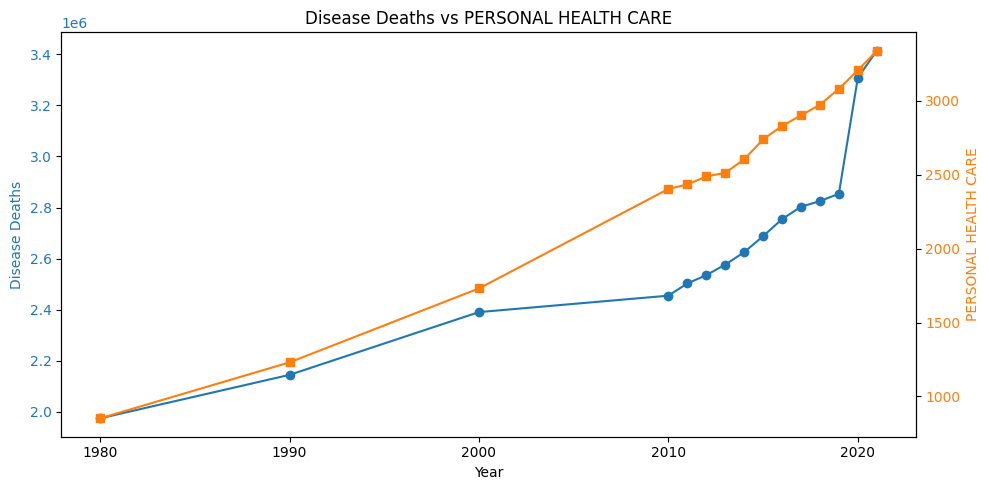

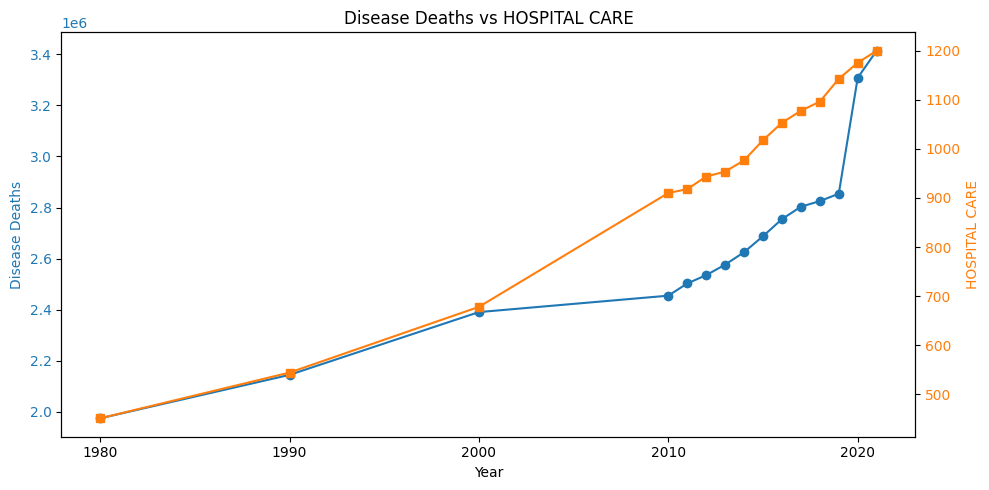

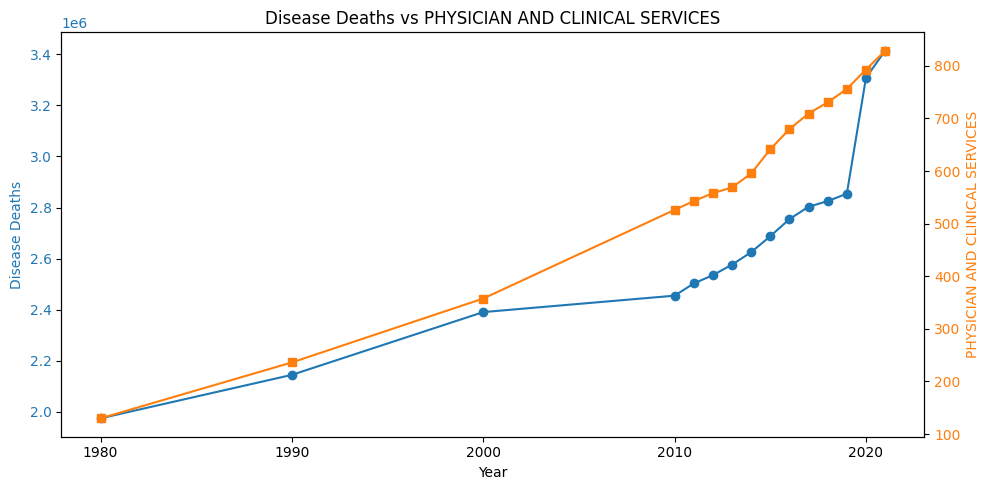

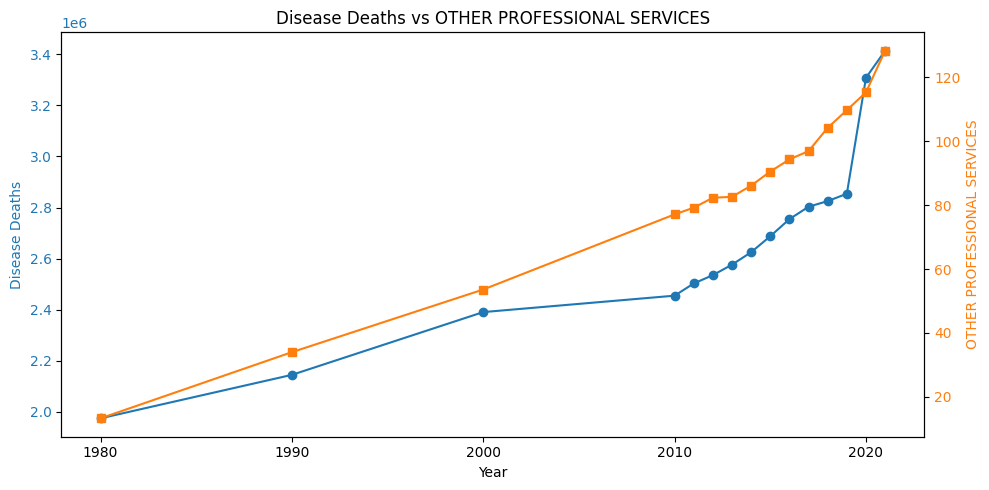

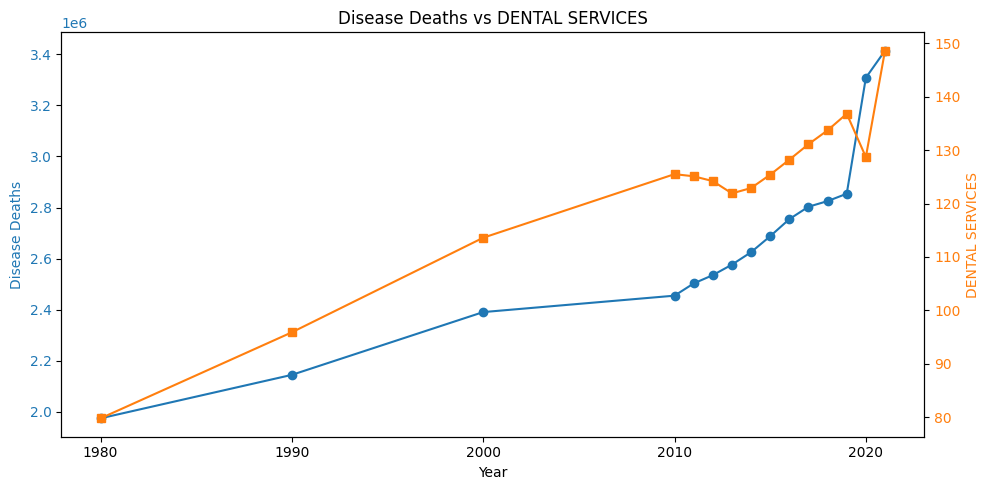

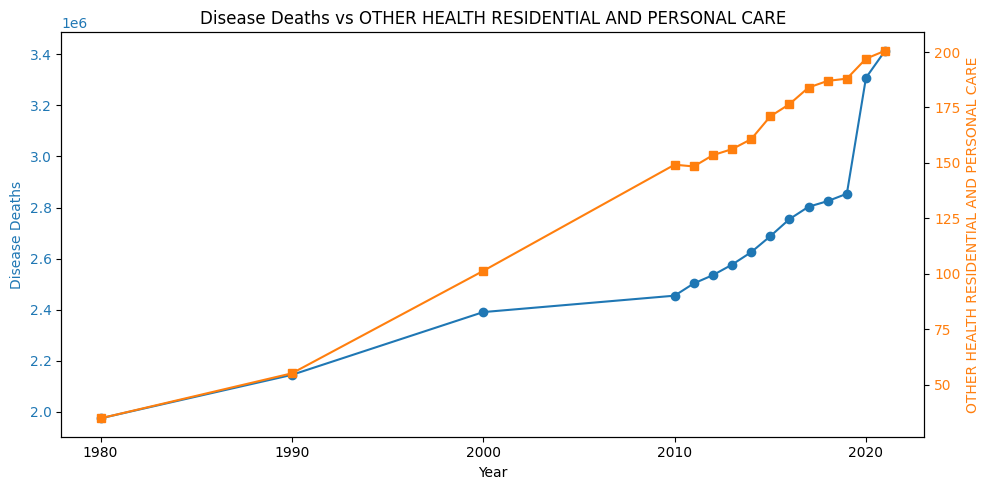

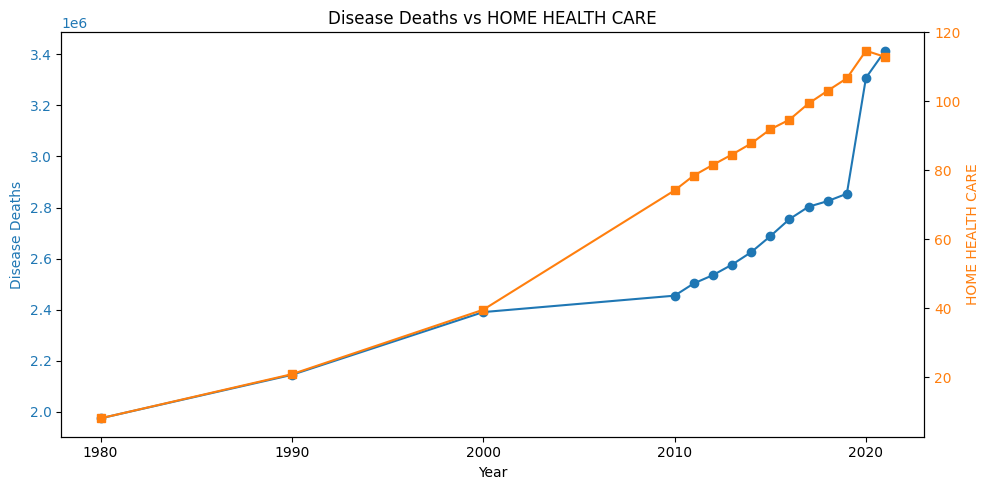

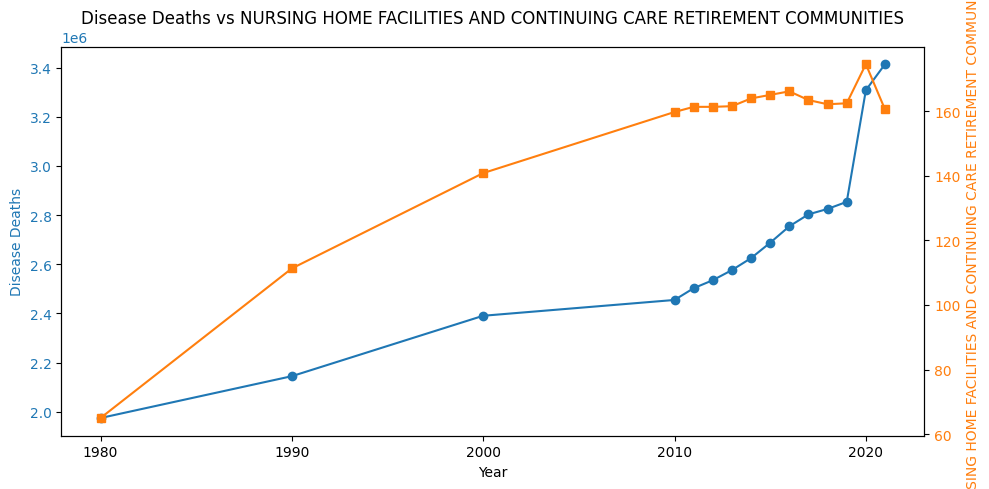

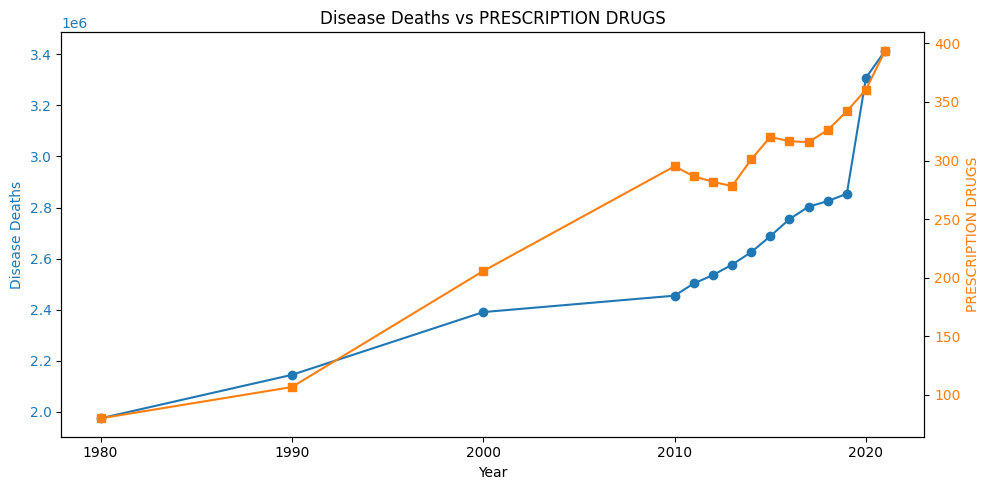

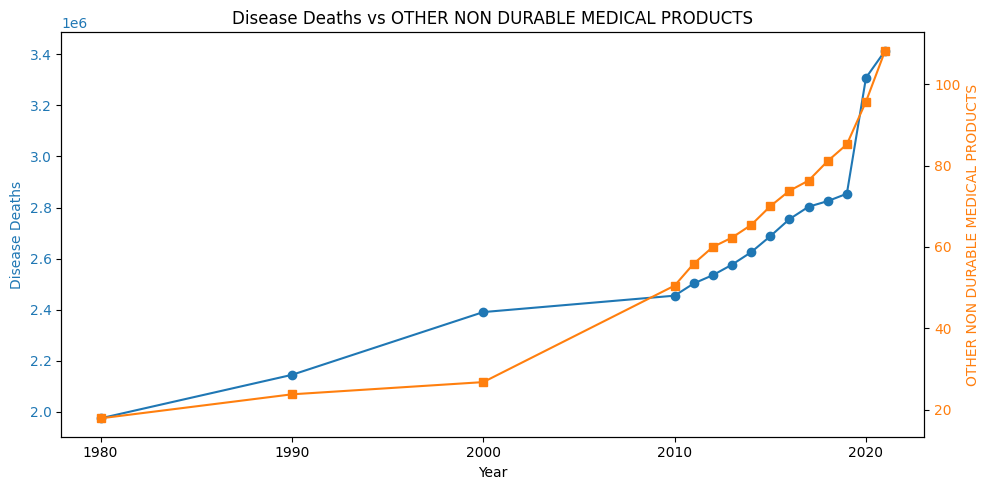

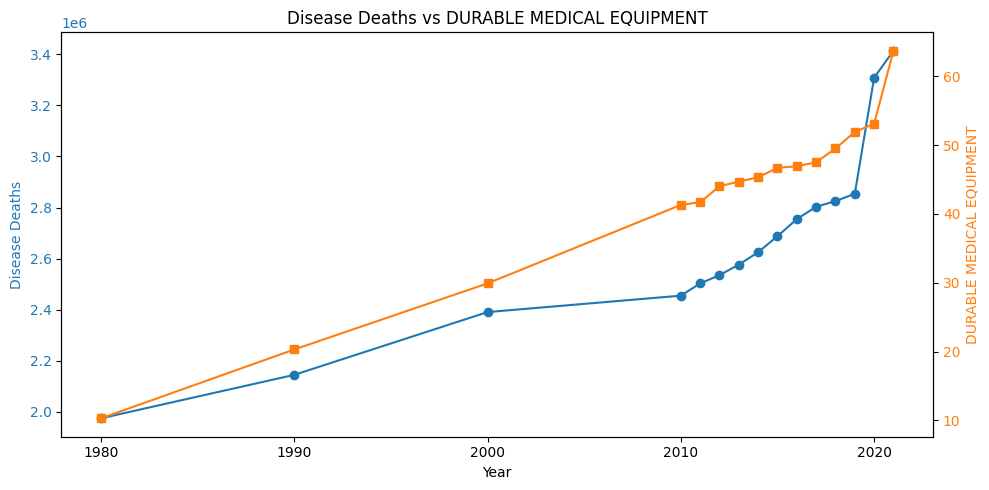

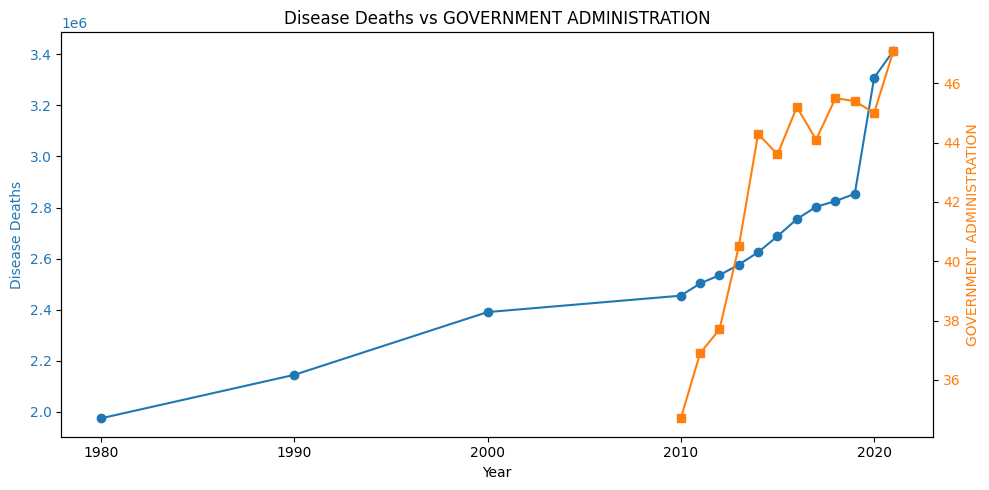

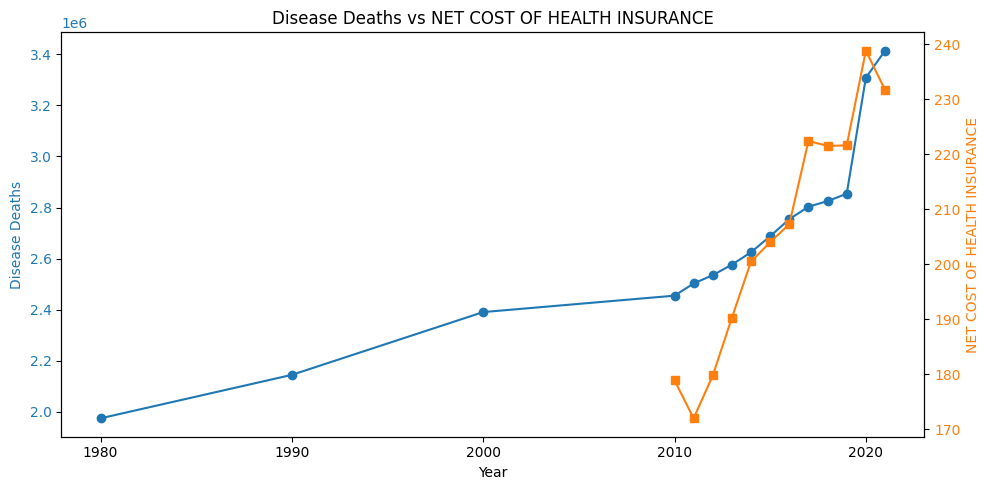

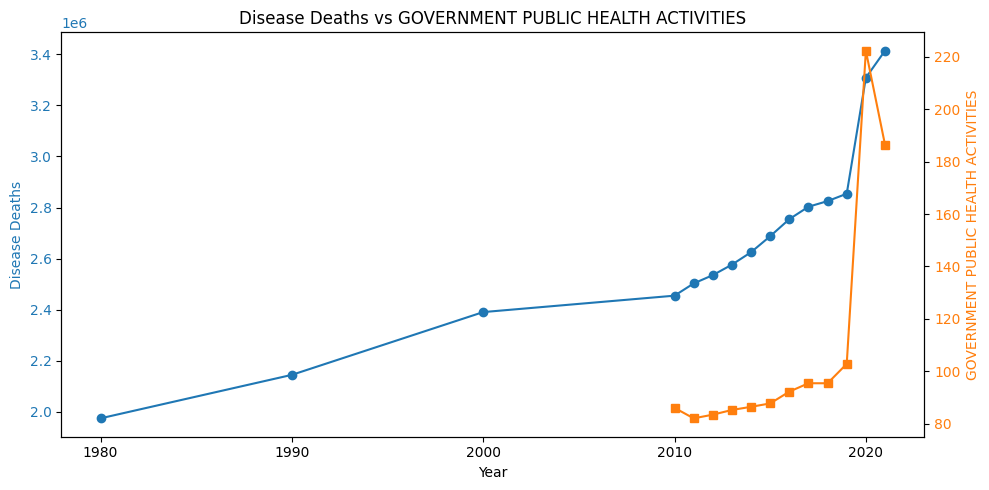

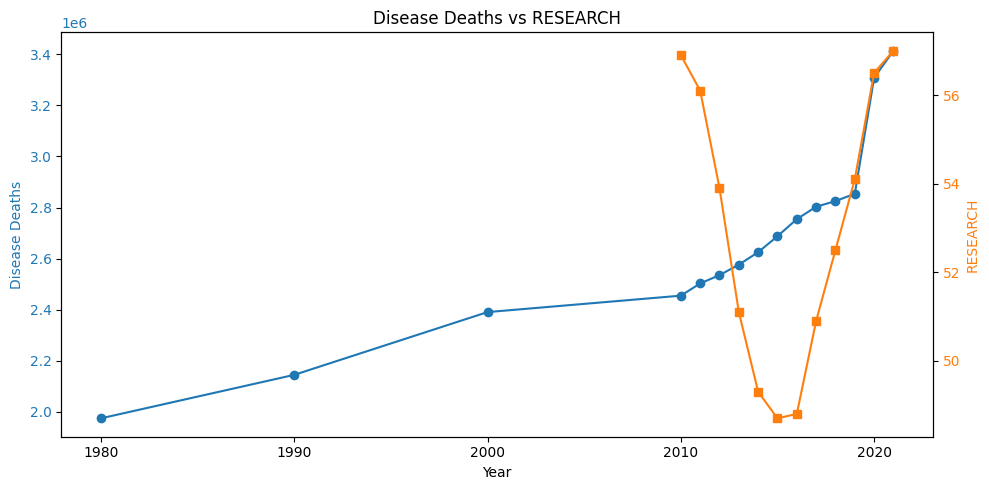

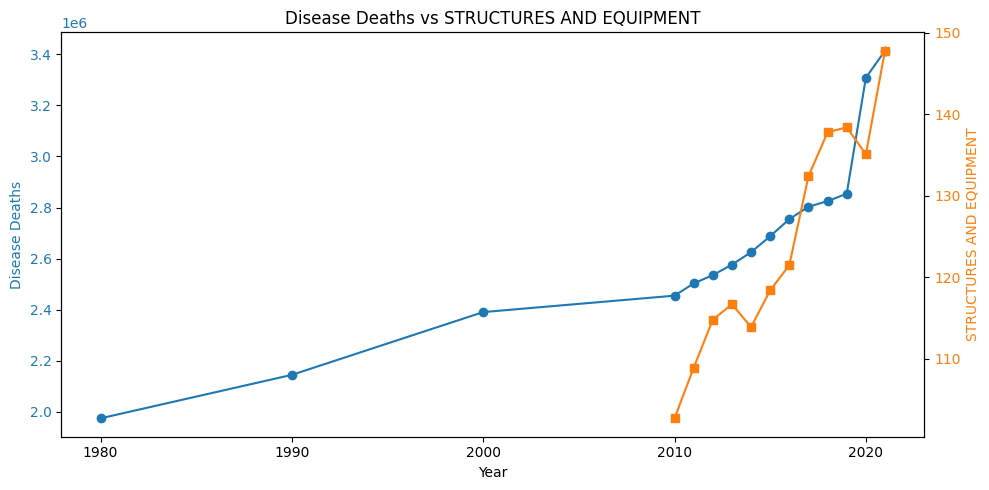

In [13]:
# List of spending columns
spending_columns = final_df.columns[2:]  # skip 'year' and 'disease_deaths'

for col in spending_columns:
    fig, ax1 = plt.subplots(figsize=(10, 5))

    ax1.set_xlabel('Year')
    ax1.set_ylabel('Disease Deaths', color='tab:blue')
    ax1.plot(final_df['year'], final_df['disease_deaths'], color='tab:blue', marker='o', label='Disease Deaths')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    ax2.set_ylabel(col.replace('_BILLIONS', '').replace('_', ' '), color='tab:orange')
    ax2.plot(final_df['year'], final_df[col], color='tab:orange', marker='s', label=col)
    ax2.tick_params(axis='y', labelcolor='tab:orange')

    plt.title(f'Disease Deaths vs {col.replace("_BILLIONS", "").replace("_", " ")}')
    fig.tight_layout()
    plt.show()



#### Summary:

Most spending categories increased along with disease deaths, suggesting that while health funding has grown, it hasn't been enough to curb rising mortality. Some categories (e.g., dental, durable equipment, administration) have weaker associations with death rates. Prescription drug spending and research, in particular, show limited impact despite high investment, raising concerns about efficiency and allocation priorities.

In [14]:
correlations = final_df.corr(numeric_only=True)["disease_deaths"].drop("disease_deaths").sort_values(ascending=False)
print(correlations)


OTHER_NON_DURABLE_MEDICAL_PRODUCTS_BILLIONS                                    0.958187
OTHER_PROFESSIONAL_SERVICES_BILLIONS                                           0.939896
PHYSICIAN_AND_CLINICAL_SERVICES_BILLIONS                                       0.924506
GOVERNMENT_PUBLIC_HEALTH_ACTIVITIES_BILLIONS                                   0.917777
DURABLE_MEDICAL_EQUIPMENT_BILLIONS                                             0.913715
PERSONAL_HEALTH_CARE_BILLIONS                                                  0.908948
HOSPITAL_CARE_BILLIONS                                                         0.906528
PRESCRIPTION_DRUGS_BILLIONS                                                    0.892378
HOME_HEALTH_CARE_BILLIONS                                                      0.890860
NET_COST_OF_HEALTH_INSURANCE_BILLIONS                                          0.882081
OTHER_HEALTH_RESIDENTIAL_AND_PERSONAL_CARE_BILLIONS                            0.877787
STRUCTURES_AND_EQUIPMENT_BILLION

In [16]:
from sklearn.linear_model import LinearRegression

X = final_df.drop(columns=["year", "disease_deaths"]).fillna(0)
y = final_df["disease_deaths"]

model = LinearRegression()
model.fit(X, y)

coefficients = pd.Series(model.coef_, index=X.columns).sort_values(key=abs, ascending=False)
print(coefficients)



DENTAL_SERVICES_BILLIONS                                                       13256.798700
OTHER_PROFESSIONAL_SERVICES_BILLIONS                                           -9622.541286
RESEARCH_BILLIONS                                                              -9344.026770
OTHER_NON_DURABLE_MEDICAL_PRODUCTS_BILLIONS                                     7213.742859
HOME_HEALTH_CARE_BILLIONS                                                       6115.299495
GOVERNMENT_PUBLIC_HEALTH_ACTIVITIES_BILLIONS                                    4399.479413
GOVERNMENT_ADMINISTRATION_BILLIONS                                              3917.824365
OTHER_HEALTH_RESIDENTIAL_AND_PERSONAL_CARE_BILLIONS                             2642.361041
HOSPITAL_CARE_BILLIONS                                                         -2126.940055
NURSING_HOME_FACILITIES_AND_CONTINUING_CARE_RETIREMENT_COMMUNITIES_BILLIONS    -1887.354362
PRESCRIPTION_DRUGS_BILLIONS                                                    -

#### Summary:

- Most spending categories are strongly correlated with disease deaths due to shared growth trends.

- Linear regression provides a nuanced view, revealing which categories might be more influential when adjusting for others.

- However, this analysis does not imply causality — further modeling (e.g., lag analysis or regularized regression) is needed to explore deeper insights.

In [18]:
query = """
SELECT * FROM SourceOfFunds
WHERE year BETWEEN 1980 AND 2021
ORDER BY year
"""
cursor.execute(query)
source_rows = cursor.fetchall()

source_df = pd.DataFrame(source_rows, columns=[col[0] for col in cursor.description])
source_df


,YEAR,NATIONAL_HEALTH_EXPENDITURE_BILLIONS,HEALTH_CONSUMPTION_EXPENDITURES_BILLIONS,OUT_OF_POCKET_BILLIONS,HEALTH_INSURANCE_BILLIONS,PRIVATE_HEALTH_INSURANCE_BILLIONS,MEDICARE_BILLIONS,MEDICAID_BILLIONS,FEDERAL_BILLIONS,STATE_AND_LOCAL_BILLIONS,OTHER_HEALTH_INSURANCE_PROGRAMS_BILLIONS,OTHER_THIRD_PARTY_PAYERS_AND_PROGRAMS_AND_PUBLIC_HEALTH_ACTIVITY_BILLIONS,INVESTMENT_BILLIONS
0,1980,253.2,232.7,55.3,140.2,67.1,37.4,26.0,14.5,11.5,9.7,37.2,20.6
1,1990,718.7,670.2,133.8,431.1,225.9,110.2,73.7,42.6,31.1,21.4,105.3,48.6
2,2000,1366.0,1280.3,193.6,902.0,441.0,224.8,200.4,116.8,83.5,35.8,184.8,85.7
3,2001,1483.4,1393.4,200.9,995.9,483.4,247.7,224.1,132.2,91.9,40.7,196.7,90.0
4,2002,1631.0,1529.6,219.1,1098.1,537.5,265.4,248.1,145.3,102.8,47.1,212.3,101.5
5,2003,1770.4,1661.8,235.1,1195.9,589.3,282.7,269.0,160.8,108.2,55.0,230.7,108.6
6,2004,1894.7,1777.8,248.4,1288.0,626.1,311.1,290.7,172.3,118.4,60.0,241.4,116.9
7,2005,2026.6,1901.0,264.5,1384.1,671.1,339.8,309.4,177.5,131.8,63.9,252.5,125.5
8,2006,2165.1,2032.1,277.9,1486.0,705.7,403.7,306.7,173.9,132.7,70.0,268.1,133.0
9,2007,2305.5,2159.3,293.6,1581.8,748.6,432.7,325.9,185.6,140.3,74.6,284.0,146.2


In [19]:
query = """
SELECT * FROM TypeOfSponsors
WHERE year BETWEEN 1987 AND 2021
ORDER BY year
"""
cursor.execute(query)
sponsor_rows = cursor.fetchall()

sponsor_df = pd.DataFrame(sponsor_rows, columns=[col[0] for col in cursor.description])
sponsor_df


,YEAR,NATIONAL_HEALTH_EXPENDITURE_BILLIONS,BUSINESS_HOUSEHOLDS_AND_OTHER_PRIVATE_BILLIONS,PRIVATE_BUSINESS_BILLIONS,HOUSEHOLD_BILLIONS,OTHER_PRIVATE_REVENUES_BILLIONS,GOVERNMENT_BILLIONS,FEDERAL_BILLIONS,STATE_AND_LOCAL_BILLIONS
0,1987,514.5,349.8,119.5,189.3,41.0,164.7,86.4,78.4
1,1988,576.6,397.5,135.4,213.9,48.2,179.2,92.5,86.7
2,1989,642.2,440.0,154.7,233.7,51.7,202.2,105.5,96.6
3,1990,718.7,483.8,173.3,254.2,56.3,234.9,125.3,109.7
4,1991,786.0,517.5,187.0,270.3,60.2,268.5,146.6,121.9
5,1992,852.2,549.2,202.1,281.1,66.0,303.0,172.2,130.8
6,1993,914.9,577.5,214.2,293.4,70.0,337.4,193.6,143.7
7,1994,966.4,602.6,224.9,304.1,73.5,363.8,205.1,158.7
8,1995,1020.3,636.8,236.9,321.6,78.3,383.5,217.6,165.9
9,1996,1073.6,669.3,252.9,332.7,83.7,404.3,232.1,172.2


In [26]:
print(source_df.columns.tolist())

['NATIONAL_HEALTH_EXPENDITURE_BILLIONS', 'HEALTH_CONSUMPTION_EXPENDITURES_BILLIONS', 'OUT_OF_POCKET_BILLIONS', 'HEALTH_INSURANCE_BILLIONS', 'PRIVATE_HEALTH_INSURANCE_BILLIONS', 'MEDICARE_BILLIONS', 'MEDICAID_BILLIONS', 'FEDERAL_BILLIONS', 'STATE_AND_LOCAL_BILLIONS', 'OTHER_HEALTH_INSURANCE_PROGRAMS_BILLIONS', 'OTHER_THIRD_PARTY_PAYERS_AND_PROGRAMS_AND_PUBLIC_HEALTH_ACTIVITY_BILLIONS', 'INVESTMENT_BILLIONS']


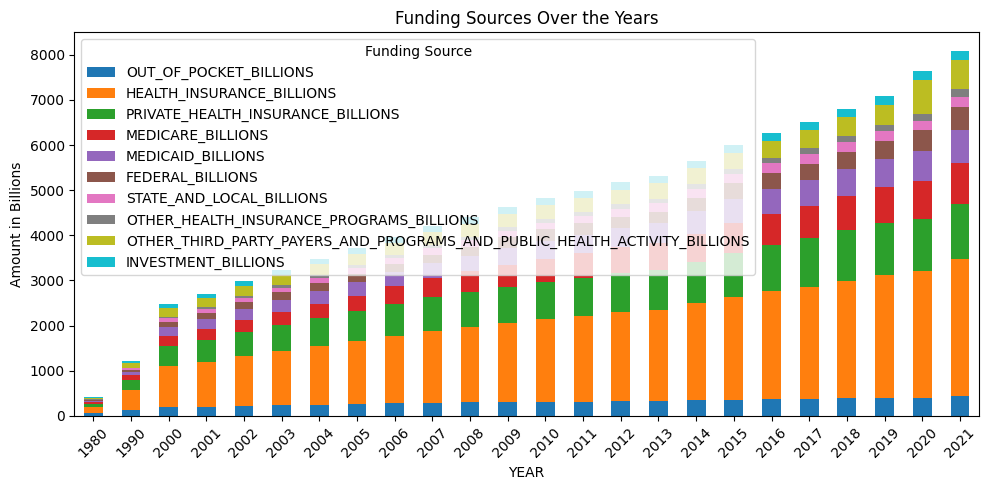

In [ ]:
# Set year as the index for cleaner plotting
source_df.set_index("YEAR", inplace=True)

# plot major funding trends in 1 plot
fig, ax = plt.subplots(figsize=(10, 5))
source_df.drop(columns=["NATIONAL_HEALTH_EXPENDITURE_BILLIONS", 
"HEALTH_CONSUMPTION_EXPENDITURES_BILLIONS"]).plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('Amount in Billions')
ax.set_title('Funding Sources Over the Years')
plt.xticks(rotation=45)
plt.legend(title='Funding Source')
plt.tight_layout()
plt.show()


#### Summary:
This plot underscores the rising complexity and scale of healthcare financing in the U.S., with a clear shift toward:

- Greater reliance on insurance systems (both public and private),

- Enhanced government support at federal and local levels,

- A gradual decline in patient-borne costs (relative to total).

In [28]:
print(sponsor_df.columns.tolist())

['YEAR', 'NATIONAL_HEALTH_EXPENDITURE_BILLIONS', 'BUSINESS_HOUSEHOLDS_AND_OTHER_PRIVATE_BILLIONS', 'PRIVATE_BUSINESS_BILLIONS', 'HOUSEHOLD_BILLIONS', 'OTHER_PRIVATE_REVENUES_BILLIONS', 'GOVERNMENT_BILLIONS', 'FEDERAL_BILLIONS', 'STATE_AND_LOCAL_BILLIONS']


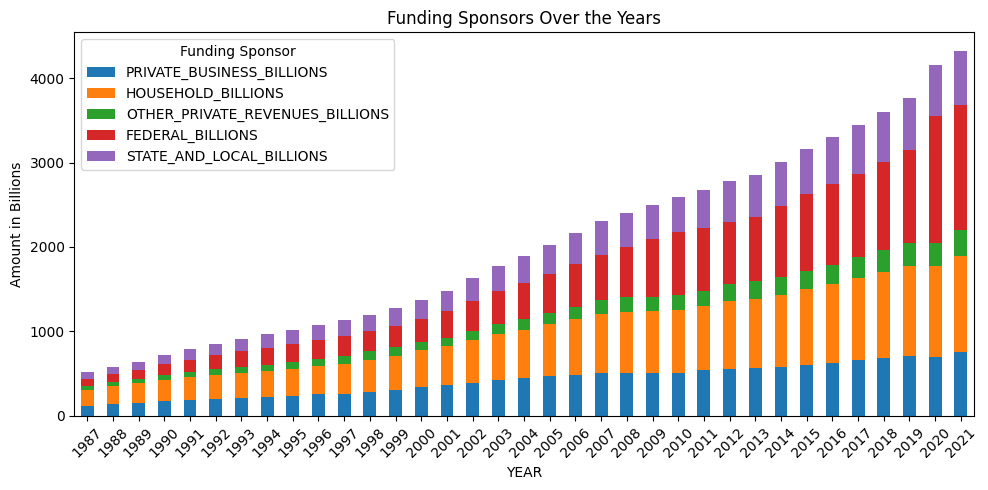

In [31]:
# set year as the index for cleaner plotting
sponsor_df.set_index("YEAR", inplace=True)

# plot sponsor trends in 1 plot
fig, ax = plt.subplots(figsize=(10, 5))
sponsor_df.drop(columns=["NATIONAL_HEALTH_EXPENDITURE_BILLIONS", 
"BUSINESS_HOUSEHOLDS_AND_OTHER_PRIVATE_BILLIONS", "GOVERNMENT_BILLIONS"]).plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('Amount in Billions')
ax.set_title('Funding Sponsors Over the Years')
plt.xticks(rotation=45)
plt.legend(title='Funding Sponsor')
plt.tight_layout()
plt.show()


#### Summary:

The chart highlights a structural shift in health financing, with:

- Increasing public sector responsibility (especially federal),

- Stabilizing roles for business and household spending,

- Growing dependence on government sponsorship to meet rising health expenditures.

#### Final Observations:
The analysis reveals a tight interweaving of rising disease burden and growing healthcare expenditures. However, not all spending categories are equally impactful on outcomes like death rates. Moreover, the financial structure of the U.S. healthcare system is shifting, with:

- Governments taking on larger roles in both funding and sponsorship,

- Private business and household contributions stabilizing, and

- Certain spending categories (e.g., research, long-term care) potentially underperforming in reducing deaths despite investments.

Further exploration could dive into cost-effectiveness across expenditure types, or model policy changes (e.g., ACA, Medicaid expansion) to isolate structural effects.